# A Coronavirus Study



![title](imgs/coronavirus.jpg)

This notebook will analyse COVID-19 data. The data will be obtained from [Our World In Data](https://ourworldindata.org/coronavirus), a scientific online publication whose research team is based at the University of Oxford and focuses on large global problems.


# Import the libraries we will use:

In [220]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# import dataset and create a data frame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Data exploration

In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame has 57394 rows and 50 columns


What columns do we have?

In [8]:
', '.join([col for col in df.columns])

'iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_per_case, positive_rate, tests_units, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index'

What data types are our columns?

In [7]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Ensure the data column is actuaklly a datetime:

In [224]:
df.date = pd.to_datetime(df.date)


In [10]:
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

# Missing data?

Let's see what columns have the must missing data

In [14]:
print(((df.isnull().sum()  / df.shape[0]).sort_values(ascending=False) * 100).to_markdown())


|                                    |         0 |
|:-----------------------------------|----------:|
| weekly_icu_admissions_per_million  | 99.378    |
| weekly_icu_admissions              | 99.378    |
| weekly_hosp_admissions             | 98.8762   |
| weekly_hosp_admissions_per_million | 98.8762   |
| icu_patients                       | 92.1769   |
| icu_patients_per_million           | 92.1769   |
| hosp_patients_per_million          | 91.2796   |
| hosp_patients                      | 91.2796   |
| new_tests                          | 62.0396   |
| new_tests_per_thousand             | 62.0396   |
| total_tests                        | 61.6388   |
| total_tests_per_thousand           | 61.6388   |
| tests_per_case                     | 60.2711   |
| positive_rate                      | 59.5585   |
| handwashing_facilities             | 57.8771   |
| new_tests_smoothed                 | 57.1175   |
| new_tests_smoothed_per_thousand    | 57.1175   |
| tests_units                  

We can see that the admissions to icu units and hospitals data is lacking the most. Also data on testing is lacking.

# What countries are most affected by COVID-19?

## Looking at the countries with the most cases

In [15]:
today = pd.Timestamp("today").strftime("%Y-%m-%d")
top_N = 10

In [25]:
# top  countries - cases
top_cases = df.loc[df['date'] == today, ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:top_N+1].reset_index(drop=True)
pd.set_option('float_format', '{:,}'.format)
print(top_cases.to_markdown())

top_cases

|    | location       |   total_cases |
|---:|:---------------|--------------:|
|  0 | United States  |   1.12055e+07 |
|  1 | India          |   8.87429e+06 |
|  2 | Brazil         |   5.87646e+06 |
|  3 | France         |   1.99123e+06 |
|  4 | Russia         |   1.97101e+06 |
|  5 | United Kingdom |   1.39068e+06 |
|  6 | Argentina      |   1.31837e+06 |
|  7 | Italy          |   1.20588e+06 |
|  8 | Colombia       |   1.20522e+06 |
|  9 | Mexico         |   1.0094e+06  |


,location,total_cases
0,United States,"11,205,486.0"
1,India,"8,874,290.0"
2,Brazil,"5,876,464.0"
3,France,"1,991,233.0"
4,Russia,"1,971,013.0"
5,United Kingdom,"1,390,681.0"
6,Argentina,"1,318,371.0"
7,Italy,"1,205,881.0"
8,Colombia,"1,205,217.0"
9,Mexico,"1,009,396.0"


In [26]:
top_5_cases_country_names = list(top_cases.iloc[:5]['location'].values)

In [30]:
world_cases = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_cases']
print(f'There are {world_cases:,} worldwide cases')

There are 55,154,651.0 worldwide cases


/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Russia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Argentina'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Mexico')])

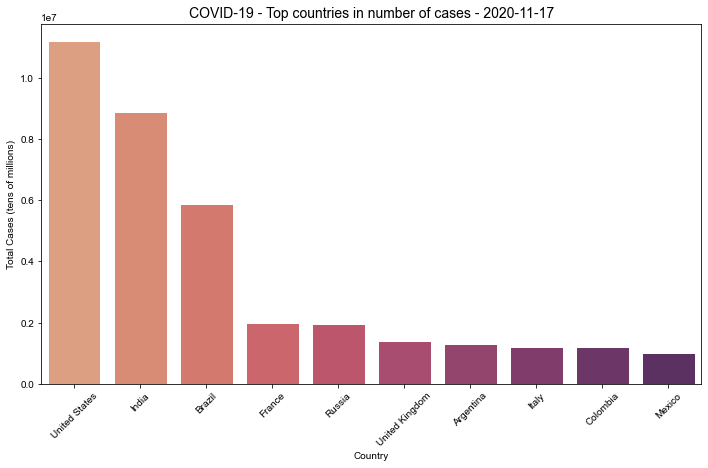

In [31]:
top_5_cases_country_names = list(top_cases.iloc[:5]['location'].values)

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_cases', data=top_cases,
                 palette='flare')
ax.set_title(f'COVID-19 - Top countries in number of cases - {today}', fontsize=14)
ax.set_xlabel('Country')

ax.set_ylabel('Total Cases (tens of millions)')
plt.tight_layout()
plt.savefig('graph1.png')
plt.xticks(rotation=45)


In [15]:
print(f'We have {world_cases:,} worldwide cases of COVID on {today}')

We have 55,154,651.0 worldwide cases of COVID on 2020-11-17


In [16]:

print('Percentage of cases from the top 10 countries on the total number: {:.2%}'.format(top_cases['total_cases'].sum() / world_cases))

Percentage of cases from the top 10 countries on the total number: 76.39%


# Per million cases

In [41]:
# top  countries - cases
top_cases_per_m = df.loc[(df['date'] == today) & (df['population'] > 10000000), ['location', 'population', 'total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False)[1:top_N+1].reset_index(drop=True)
pd.set_option('float_format', '{:,}'.format)
print(top_cases_per_m.to_markdown())

#top_cases_per_m

|    | location       |   population |   total_cases_per_million |
|---:|:---------------|-------------:|--------------------------:|
|  0 | United States  |  3.31003e+08 |                   33853.2 |
|  1 | France         |  6.52735e+07 |                   30506   |
|  2 | Argentina      |  4.51958e+07 |                   29170.2 |
|  3 | Peru           |  3.29718e+07 |                   28456.6 |
|  4 | Chile          |  1.91162e+07 |                   27861.4 |
|  5 | Brazil         |  2.12559e+08 |                   27646.2 |
|  6 | Netherlands    |  1.71349e+07 |                   26388.1 |
|  7 | Colombia       |  5.08829e+07 |                   23686.1 |
|  8 | Portugal       |  1.01967e+07 |                   22131.9 |
|  9 | United Kingdom |  6.7886e+07  |                   20485.5 |


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Argentina'),
  Text(3, 0, 'Peru'),
  Text(4, 0, 'Chile'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'United Kingdom')])

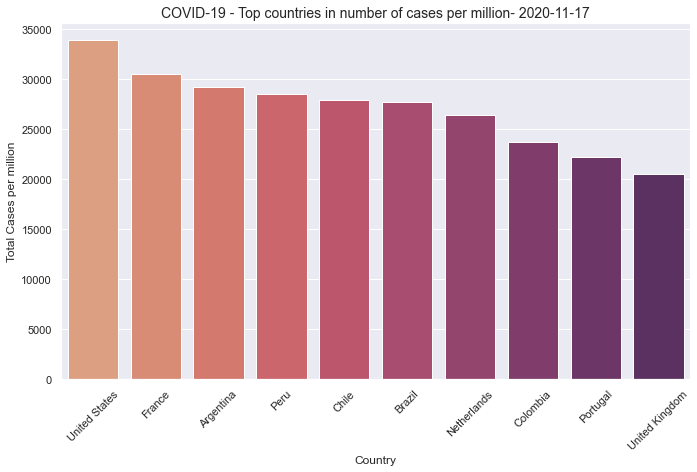

In [43]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_cases_per_million', data=top_cases_per_m,
                 palette='flare')
ax.set_title(f'COVID-19 - Top countries in number of cases per million- {today}', fontsize=14)
ax.set_xlabel('Country')

ax.set_ylabel('Total Cases per million')
plt.tight_layout()
plt.savefig('cov_graph2.png')
plt.xticks(rotation=45)

## Looking at the countries with the most deaths

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


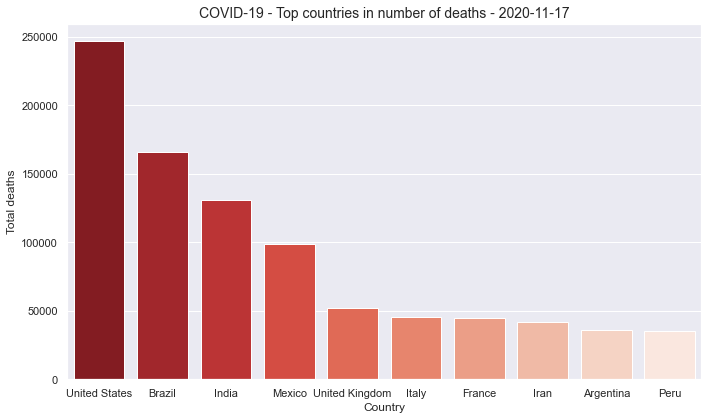

In [17]:
# top countries - deaths
top_deaths =df.loc[df['date'] == today, ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:11].reset_index(drop=True)
top_deaths

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_deaths', data=top_deaths,
                 palette='Reds_r')
ax.set_title(f'COVID-19 - Top countries in number of deaths - {today}', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('Total deaths')
plt.tight_layout()
plt.savefig('graph2.png')

In [46]:
# top  countries - cases
top_deaths_per_m = df.loc[(df['date'] == today) & (df['population'] > 10000000), ['location', 'population', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[1:top_N+1].reset_index(drop=True)
pd.set_option('float_format', '{:,}'.format)
print(top_deaths_per_m.to_markdown())
top_deaths_per_m

|    | location       |   population |   total_deaths_per_million |
|---:|:---------------|-------------:|---------------------------:|
|  0 | Argentina      |  4.51958e+07 |                    790.494 |
|  1 | Brazil         |  2.12559e+08 |                    781.024 |
|  2 | Chile          |  1.91162e+07 |                    777.508 |
|  3 | United Kingdom |  6.7886e+07  |                    768.155 |
|  4 | Mexico         |  1.28933e+08 |                    766.764 |
|  5 | Bolivia        |  1.1673e+07  |                    758.072 |
|  6 | Italy          |  6.04618e+07 |                    756.395 |
|  7 | United States  |  3.31003e+08 |                    746.882 |
|  8 | Ecuador        |  1.76431e+07 |                    737.741 |
|  9 | France         |  6.52735e+07 |                    690.234 |


,location,population,total_deaths_per_million
0,Argentina,"45,195,777.0",790.4939999999999
1,Brazil,"212,559,409.0",781.0239999999999
2,Chile,"19,116,209.0",777.508
3,United Kingdom,"67,886,004.0",768.155
4,Mexico,"128,932,753.0",766.7639999999999
5,Bolivia,"11,673,029.0",758.072
6,Italy,"60,461,828.0",756.395
7,United States,"331,002,647.0",746.882
8,Ecuador,"17,643,060.0",737.7410000000001
9,France,"65,273,512.0",690.2339999999999


In [67]:
top_deaths_per_m['location'].values

array(['Argentina', 'Brazil', 'Chile', 'United Kingdom', 'Mexico',
       'Bolivia', 'Italy', 'United States', 'Ecuador', 'France'],
      dtype=object)

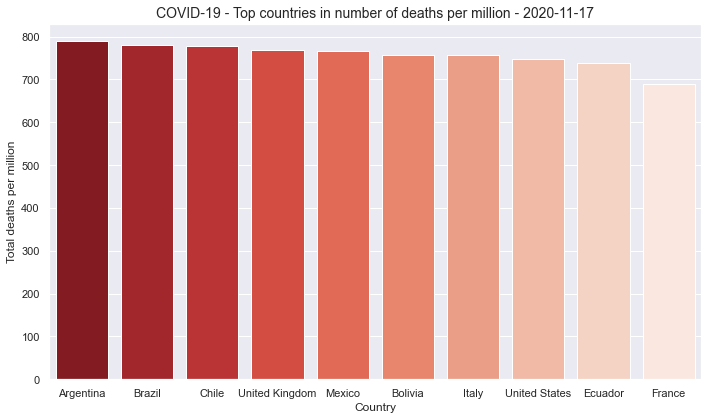

In [48]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(10, 6))
sns.set()

# plot with seaborn
ax = sns.barplot('location', y='total_deaths_per_million', data=top_deaths_per_m,
                 palette='Reds_r')
ax.set_title(f'COVID-19 - Top countries in number of deaths per million - {today}', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('Total deaths per million')
plt.tight_layout()
plt.savefig('cov_graph3.png')

In [49]:
world_deaths = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_deaths']
world_deaths

1328537.0

In [56]:
top_deaths_sum = df.loc[(df['date'] == today), ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:top_N+1]['total_deaths'].sum()
top_deaths_sum

898525.0

In [58]:
print(f'We have {world_deaths:,} worldwide deaths from of COVID on {today}. And {100*top_deaths_sum/world_deaths: .2f}% came from the {top_N} countries')

We have 1,328,537.0 worldwide deaths from of COVID on 2020-11-17. And  67.63% came from the 10 countries


In [21]:
print(f'Percentage of deaths from the top 10 countries on the total number: {:.2%}'.format(top_deaths['total_deaths'].sum() / world_deaths))

Percentage of deaths from the top 10 countries on the total number: 67.63%


# Testing

So even though Brazil came out not so badly in terms of cases per million, it doesn't stack up quite so well in terms of deaths per million.
Could the differences be explained by lack of testing?

In [126]:
# df[df['total_tests_per_thousand'].isnull() == False].groupby('location')['date'].sort_values(by='date')
df_tests = df[(df['total_tests_per_thousand'].isnull() == False) & (df['population'] > 10000000) ]
df_tests_per_k = df_tests.loc[df_tests.groupby('location').date.idxmax()][['location', 'population', 'date', 'total_cases_per_million', 'total_tests_per_thousand']]

df_tests_per_k['total_cases_per_million_per_tests_per_thousand'] = df_tests_per_k['total_cases_per_million']/df_tests_per_k['total_tests_per_thousand']


df_tests_per_k = df_tests_per_k.sort_values(by='total_cases_per_million_per_tests_per_thousand', ascending=False)[0:50].reset_index(drop=True)
df_tests_per_k
# print(df_tests_per_k.to_markdown())

,location,population,date,total_cases_per_million,total_tests_per_thousand,total_cases_per_million_per_tests_per_thousand
0,Peru,"32,971,846.0",2020-09-05,"20,528.058999999997",19.123,"1,073.4748208963026"
1,Brazil,"212,559,409.0",2020-09-19,"21,147.89",30.21,700.0294604435617
2,Mexico,"128,932,753.0",2020-11-09,"7,506.432",17.149,437.7183509242521
3,Bolivia,"11,673,029.0",2020-11-13,"12,240.953000000001",29.393,416.45810226924783
4,Ecuador,"17,643,060.0",2020-11-13,"10,061.35",30.555,329.2865324824088
5,Colombia,"50,882,884.0",2020-11-11,"22,732.104",89.101,255.12737230783043
6,Guatemala,"17,915,567.0",2020-11-13,"6,337.673000000001",26.627,238.0167874713637
7,Dominican Republic,"10,847,904.0",2020-11-09,"12,000.659",58.011,206.86868007791625
8,Madagascar,"27,691,019.0",2020-11-07,621.609,3.322,187.11890427453343
9,Bangladesh,"164,689,383.0",2020-11-15,"2,613.988",15.417,169.55231238243496


# Rise of COVID

## Case number time series

Here we consider the time series of COVID's rise for the countries with the most cases

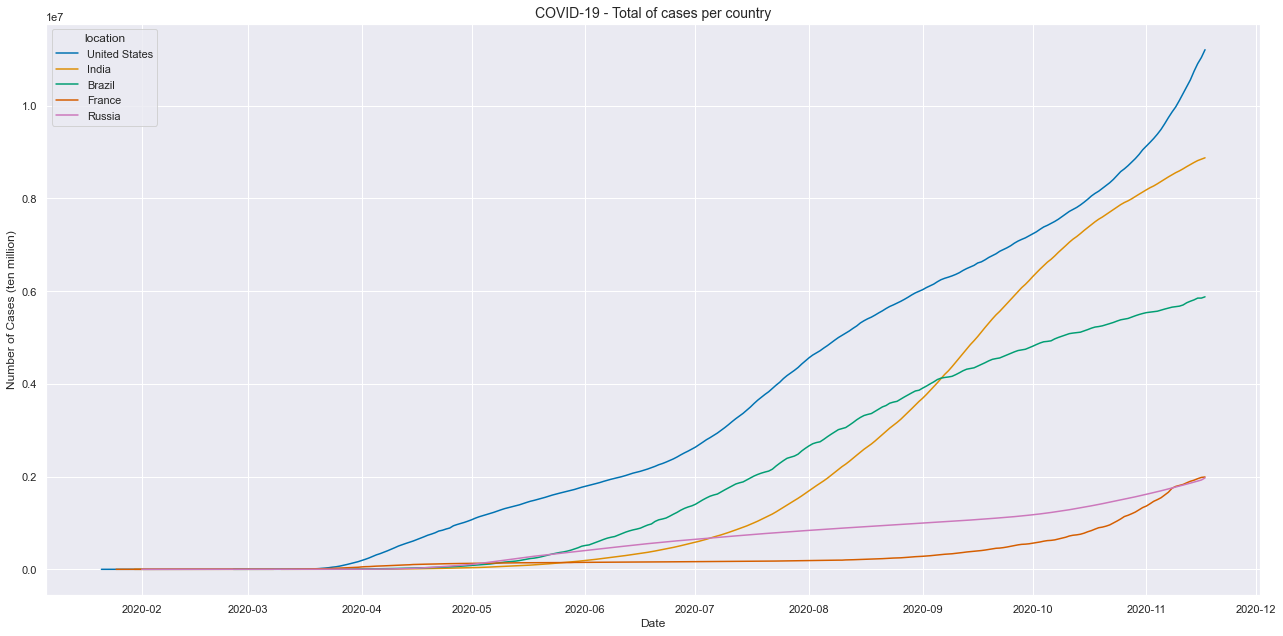

In [59]:
top_evo_cases = df.copy()
top_evo_cases.set_index('location', inplace = True)
top_evo_cases = top_evo_cases.loc[top_5_cases_country_names]
top_evo_cases = top_evo_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=top_evo_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases (ten million)')

plt.tight_layout()
plt.savefig('cov_evo_cases.png')

The number of cases starting increasing around mid to late March for the US, with upsticks around July and again in October, showing no sign of levelling off.

For a while Brazil was the country with the 2nd highest number of cases, until it was overtaken by India in early September. 

## Death count time series

['Argentina' 'Brazil' 'Chile' 'United Kingdom' 'Mexico' 'Bolivia' 'Italy'
 'United States' 'Ecuador' 'France']


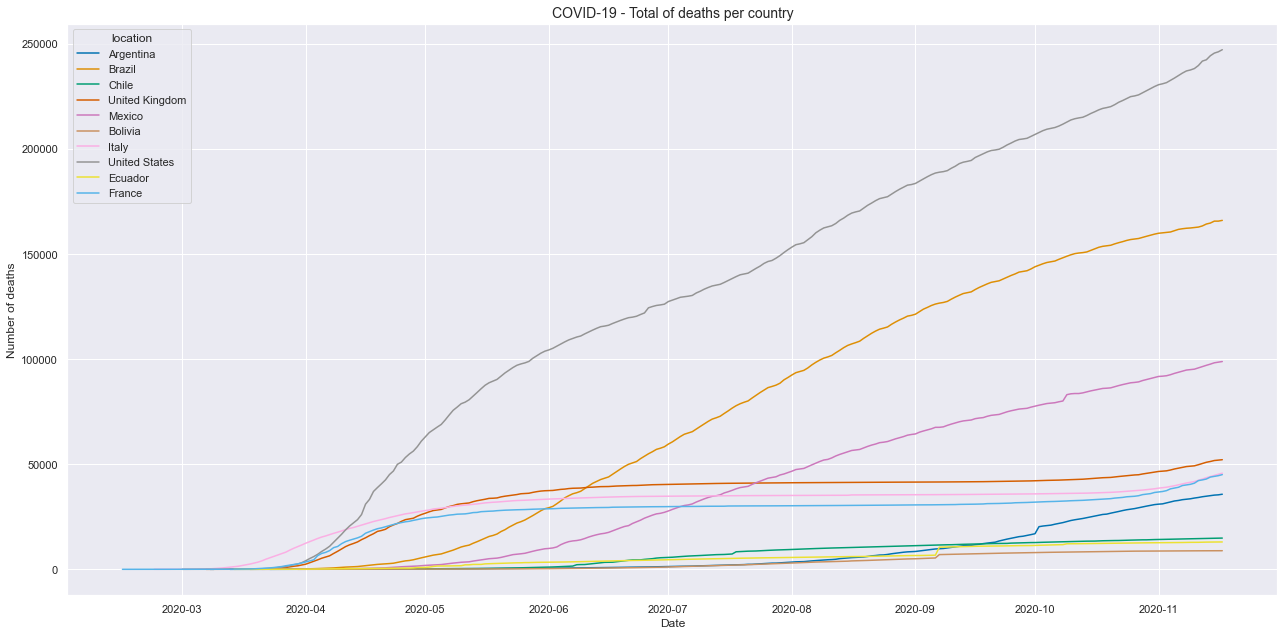

In [70]:
top_evo_death = df.copy()
top_deaths_country_names = top_deaths_per_m['location'].values
print(top_deaths_country_names)


top_evo_death.set_index('location', inplace = True)
top_evo_death = top_evo_death.loc[top_deaths_country_names]
top_evo_death = top_evo_death.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_deaths', hue='location', data=top_evo_death, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of deaths per country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of deaths')

plt.tight_layout()
plt.savefig('graph_death_evo.png')

The US also leads the world in total death count. There the death count has been rising since mid to late March and seems to show no sign of flattening out. Brazil despite now having less cases than India, still leads India in terms of total deaths.

The UK had an initial sharp rise in death count, but appeared to flatten out around late May, however in November it looks like the total death count is once again on the rise.


In [24]:
df_brazil = df.loc[df['location'] == 'Brazil'].copy()
df_brazil.set_index('date', inplace=True)

# A closer look at the UK

In [233]:
# Data for just Brazil
df_uk = df.loc[df['location'] == 'United Kingdom'].copy()
df_uk.set_index('date', inplace=True)

In [234]:
df_uk.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,GBR,Europe,United Kingdom,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
2020-01-01,GBR,Europe,United Kingdom,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
2020-01-02,GBR,Europe,United Kingdom,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
2020-01-03,GBR,Europe,United Kingdom,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
2020-01-04,GBR,Europe,United Kingdom,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


Text(0, 0.5, 'Number new deaths')

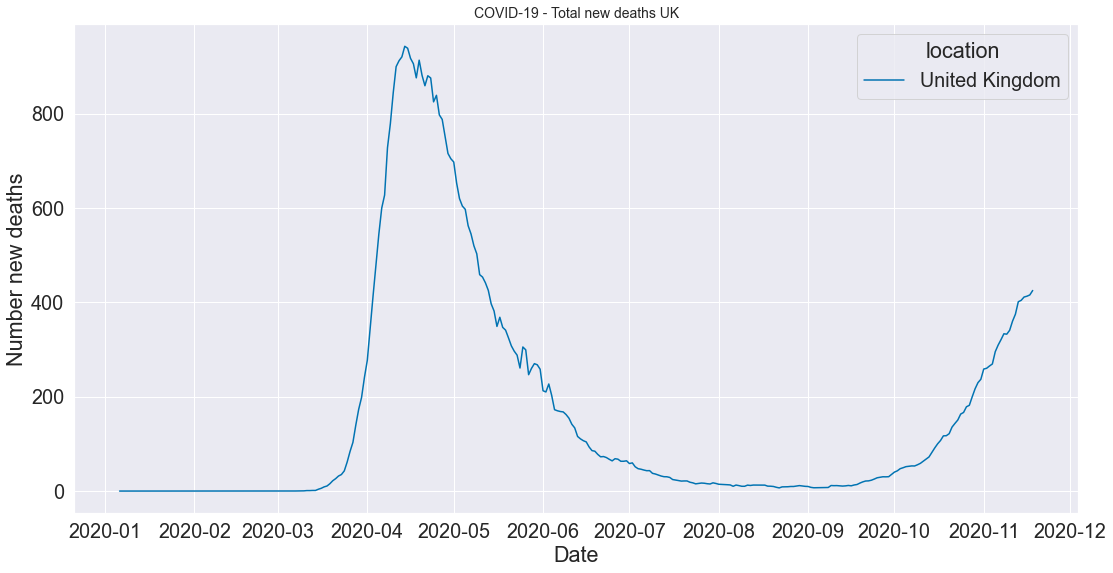

In [264]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='new_deaths_smoothed', hue='location', data=df_uk, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total new deaths UK', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number new deaths')

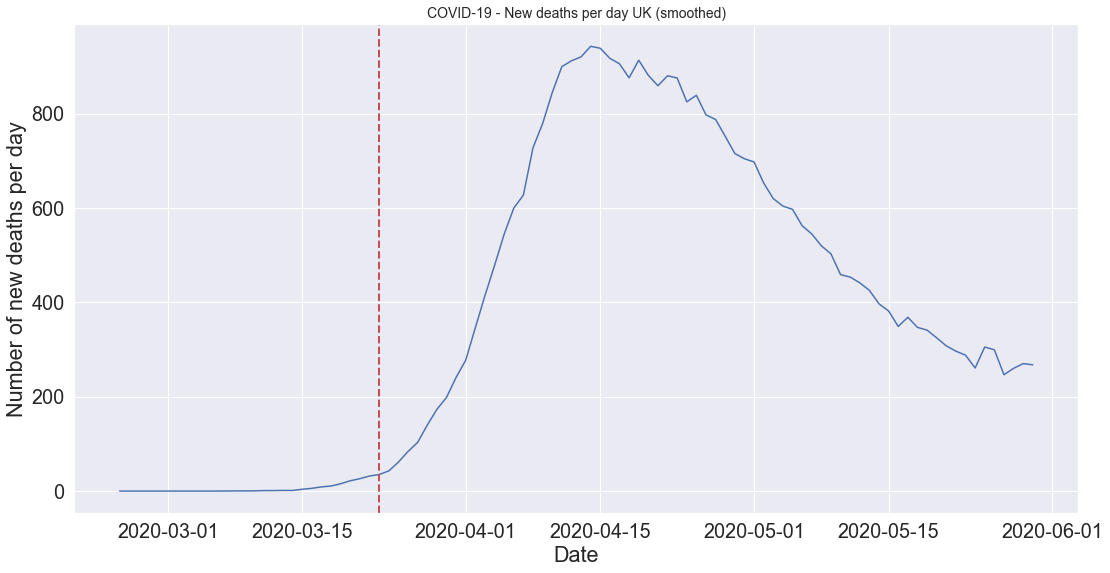

In [261]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='new_deaths_smoothed', data=df_uk.loc['2020-02-25':'2020-05-30'], 
                  palette='colorblind');
ax.set_title('COVID-19 - New deaths per day UK (smoothed)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of new deaths per day')

# Date of 1st UK lockdown
ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2)

plt.savefig('uk_lockdowns_1st_deaths.png')

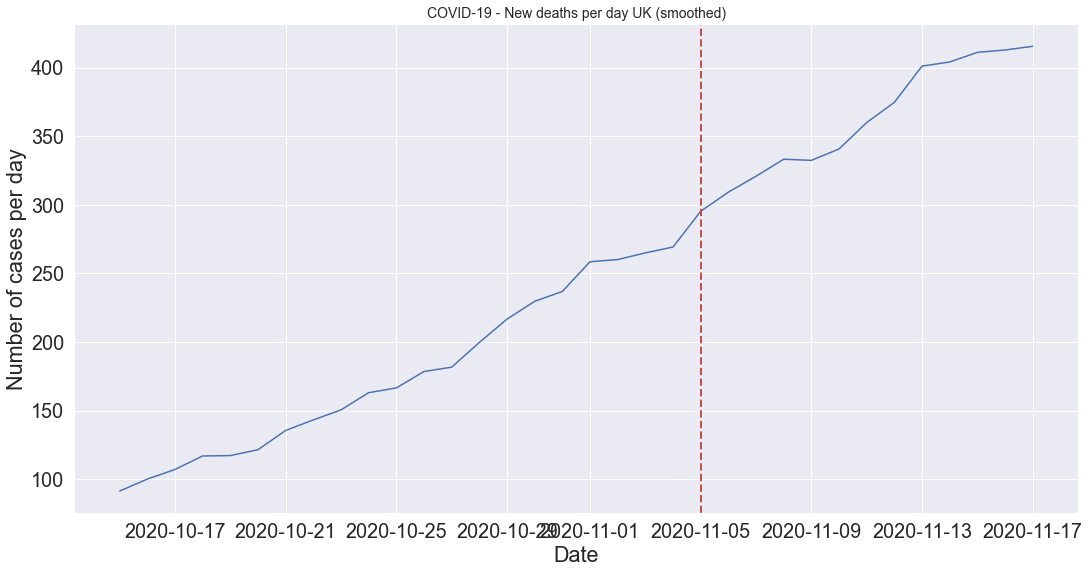

In [262]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='new_deaths_smoothed', data=df_uk.loc['2020-10-15':'2020-11-17'], 
                  palette='colorblind');
ax.set_title('COVID-19 - New deaths per day UK (smoothed)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases per day')

# Date of the 2nd UK lockdown
ax.axvline(pd.to_datetime('2020-11-05'), color='r', linestyle='--', lw=2)

plt.savefig('uk_lockdowns_2_deaths.png')

# A closer look at Brazil

Brazil has been something of an exception to most countries in the world. President Bolsonero is not a fan of lockdowns and the policy in Brazil was much more relaxed than
most countries around the globe. Borders reopened around July and tourism has been allowed since that time.

In [71]:
# Data for just Brazil
df_brazil = df.loc[df['location'] == 'Brazil'].copy()
df_brazil.set_index('date', inplace=True)

In [72]:
df_brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-01,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-02,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-03,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-04,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759


In [27]:
# When did Brazil record a first case?
first_case_br = df_brazil.loc[df_brazil['total_cases'] == 1, ['total_cases']].sort_values(by='date').head(1)
first_case_br

,total_cases
date,
2020-02-26,1.0


In [28]:
# When did it record a first death?
first_death_br = df_brazil.loc[df_brazil['total_deaths'] == 1, ['total_deaths']].sort_values(by='date').head(1)
first_death_br

,total_deaths
date,
2020-03-18,1.0


# Let's check the lag between cases reported and total deaths for Brazil

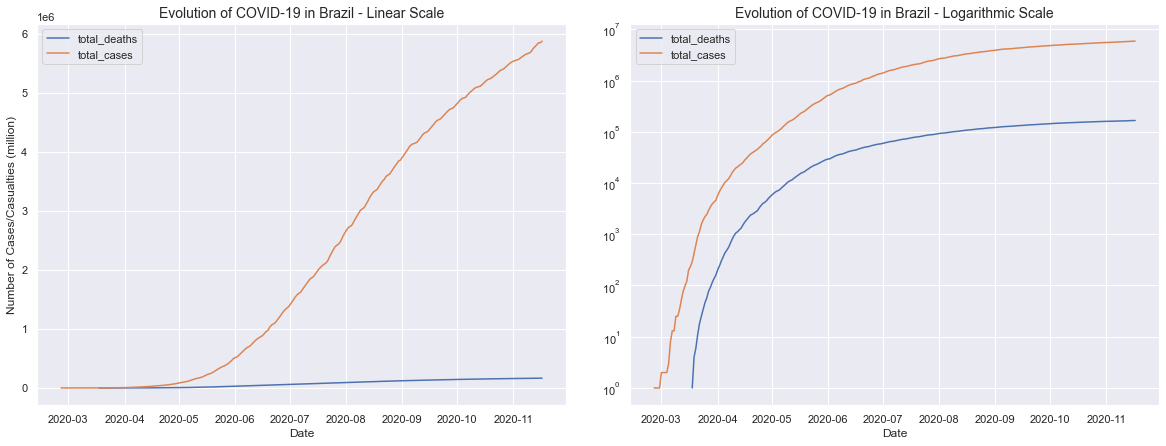

In [73]:

# create the matplotlib figure instance
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# linear scale
ax[0].plot('total_deaths', data=df_brazil)
ax[0].plot('total_cases', data=df_brazil)
ax[0].set_title('Evolution of COVID-19 in Brazil - Linear Scale', fontsize=14)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Cases/Casualties (million)')
ax[0].legend()

# logarithmic scale
plt.yscale('log')
ax[1].plot('total_deaths', data=df_brazil)
ax[1].plot('total_cases', data=df_brazil)
ax[1].set_title('Evolution of COVID-19 in Brazil - Logarithmic Scale', fontsize=14)
ax[1].set_xlabel('Date')
ax[1].legend()

plt.tight_layout(pad=3.0)
plt.savefig('brazil_case_death_lag.png')

We see that there is a lag between total cases and total deaths that appears to be around 2 weeks

Text(0, 0.5, 'Number of deaths')

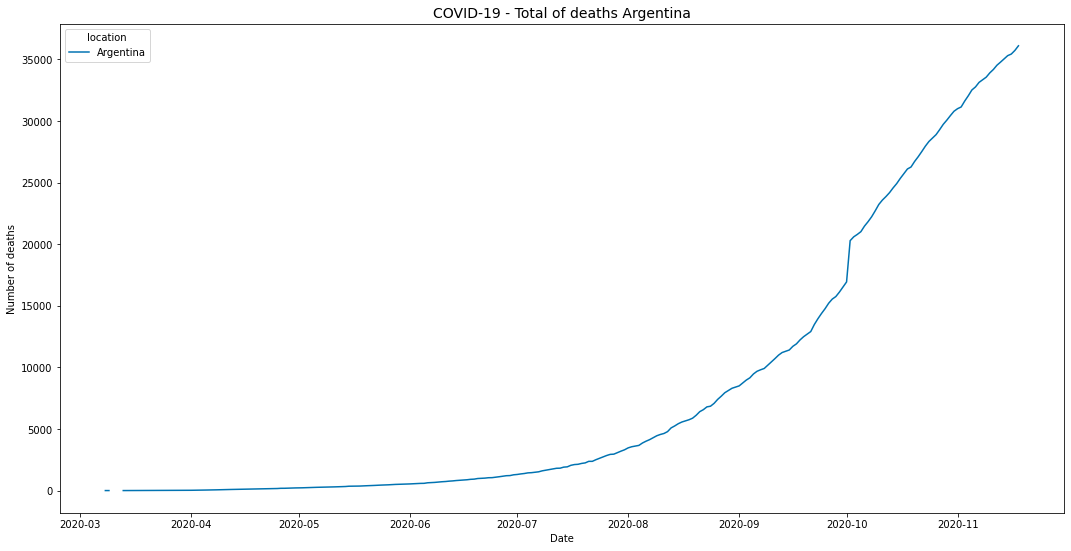

In [6]:
# Data for just arg
df_arg = df.loc[df['location'] == 'Argentina'].copy()
df_arg.set_index('date', inplace=True)

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_deaths', hue='location', data=df_arg, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of deaths Argentina', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of deaths')

Text(0, 0.5, 'Number of cases (millions)')

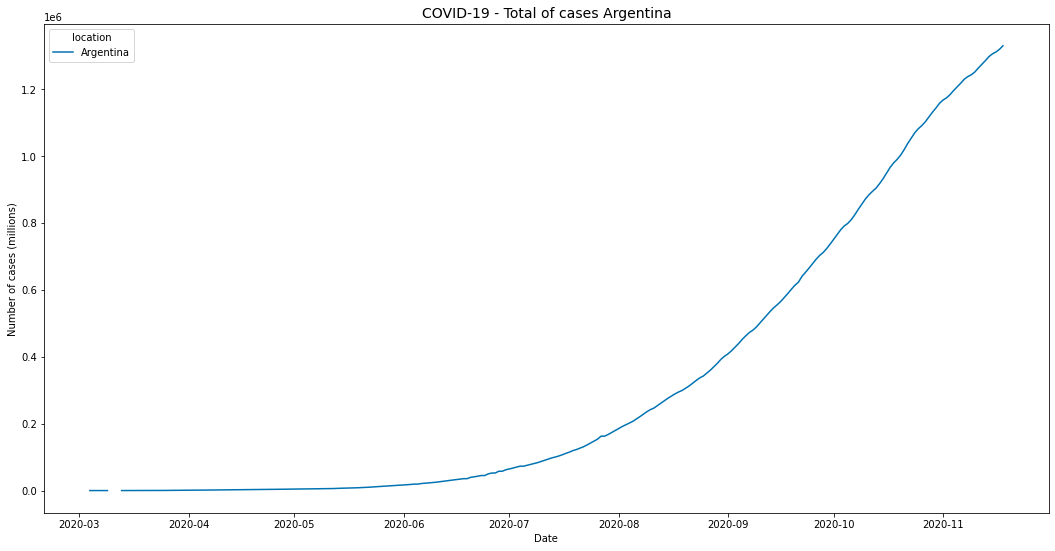

In [8]:
# Data for just arg
df_arg = df.loc[df['location'] == 'Argentina'].copy()
df_arg.set_index('date', inplace=True)

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=df_arg, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases Argentina', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases (millions)')

# Economic impact

The data to measure the economic impact was obtained from OECD.stat OECD's quarterly national accounts data, available at [OECD.stat] (https://stats.oecd.org/Index.aspx?DatasetCode=SNA_TABLE1#)

We will compute the percentage change in GDP compared with the same quarter of the previous year (Q2 2019)

In [9]:
df2 = pd.read_csv('./data/QNA_16112020232419872.csv')

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
df2.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2017-Q4,Q4-2017,JPY,Yen,6,Millions,NaN,NaN,27492200.0,NaN,NaN
1,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q1,Q1-2018,JPY,Yen,6,Millions,NaN,NaN,27715100.0,NaN,NaN
2,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q2,Q2-2018,JPY,Yen,6,Millions,NaN,NaN,28686300.0,NaN,NaN
3,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q3,Q3-2018,JPY,Yen,6,Millions,NaN,NaN,28041800.0,NaN,NaN
4,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q4,Q4-2018,JPY,Yen,6,Millions,NaN,NaN,27811100.0,NaN,NaN


In [14]:
df2['SUBJECT'].unique()

array(['GFSPB', 'GFSPR', 'PCGNPA', 'B1_GA', 'B1_GE', 'B1_GI', 'B1_GS1',
       'B1G', 'B1GA_B', 'B1GC_E', 'B1GD', 'B1GF', 'B1GG_I', 'B1GG_P',
       'B1GJ_K', 'B1GL_P', 'B2G_B3G', 'B2N_B3N', 'B5_GS1', 'B5_NS1',
       'B6GS1', 'B6NS1', 'B8GS1', 'B8NS1', 'B9S1', 'D1', 'D1_D4NFRS2',
       'D11', 'D1S1', 'D2_D3', 'D21_D31', 'D21S1', 'D2S1', 'D31S1',
       'D3S1', 'D5_D7NFRS2', 'D9FRS2', 'D9NFRS2', 'D9TOS2', 'EEM',
       'EEMA_B', 'EEMC_E', 'EEMD', 'EEMF', 'EEMG_I', 'EEMJ_K', 'EEML_P',
       'EEMNC', 'ESE', 'ESEA_B', 'ESEC_E', 'ESED', 'ESEF', 'ESEG_I',
       'ESEJ_K', 'ESEL_P', 'ESENC', 'ETO', 'ETOA_B', 'ETOC_E', 'ETOD',
       'ETOF', 'ETOG_I', 'ETOJ_K', 'ETOL_P', 'ETONC', 'GDIS1', 'K1',
       'K1MS1', 'K1S1', 'K2S1', 'P3', 'P3_P5', 'P3_P51', 'P311B', 'P312B',
       'P312N', 'P313B', 'P314B', 'P31DC', 'P31NC', 'P31S13', 'P31S14',
       'P31S14_S15', 'P31S14_S15B', 'P31S15', 'P31S15B', 'P32S13', 'P3S1',
       'P3S13', 'P41', 'P5', 'P51', 'P51A', 'P51S', 'P51S13',
       'P51S1LESS

In [15]:
df2['MEASURE'].unique()

array(['CARSA', 'CQR', 'CQRSA', 'LNBARSA', 'LNBQR', 'LNBQRSA', 'CAR',
       'VNBAR', 'VNBQR', 'VNBARSA', 'VNBQRSA', 'GPSA', 'GYSA', 'CPCARSA',
       'DNBSA', 'DOBSA', 'VIXOBSA', 'VOBARSA', 'VPVOBARSA', 'HRS',
       'HRSSA', 'PERSA', 'PER', 'CTQRGPSA', 'HCPCARSA', 'HVPVOBARSA',
       'CD', 'VIXNB', 'VIXNBSA'], dtype=object)

Here the "B1_GA" is the GDP measured by the "output approach" to calculate GDP. It sums the gross value added of various sectors, plus taxes and less subsidies on products.

In [118]:
df2[df2['Period'].isin(['Q2-2019', 'Q2-2020'])]['MEASURE'].value_counts()

CQR           8436
CQRSA         7318
LNBQRSA       4119
LNBQR         3945
PER           2841
PERSA         2353
HRS           2248
HRSSA         2032
CARSA         1094
DNBSA          706
VOBARSA        674
VPVOBARSA      655
CPCARSA        654
DOBSA          639
VIXOBSA        639
GPSA           632
GYSA           632
VNBQR          436
LNBARSA        291
VNBQRSA        260
CAR            247
VNBARSA        162
CTQRGPSA       155
VNBAR          150
CD             100
HCPCARSA        90
HVPVOBARSA      90
VIXNBSA         42
VIXNB           18
Name: MEASURE, dtype: int64

In [121]:
df2[df2['Period'].isin(['Q2-2019', 'Q2-2020'])]['SUBJECT'].value_counts()[:50]

B1_GE          1534
P6             1338
P7             1338
P31S14_S15     1336
P3S13          1334
P51            1334
RB1_GE          531
P3              500
P5              480
B11             402
P62             368
P72             368
P71             368
P61             368
P51A            363
B1_GA           346
B1GVA           332
B1G             332
B1GVC           332
P51N1111        331
B1GVB_E         330
B1GVO_Q         328
B1GVF           328
B1GVG_I         326
D21_D31         320
B1GVL           320
B1GVJ           320
B1GVK           319
P31DC           317
P51N1112        316
P51N1113        315
P311B           312
B1GVR_U         308
B1GVM_N         305
B1GVG_U         302
P51N112         301
P31S14          300
P31S15          298
P51N11131       291
P3_P5           286
P31S14_S15B     286
P312N           274
P51N1114        266
RB1_GA          262
P52_P53         262
EEM             253
ETO             251
ETOVO_Q         250
P41             250
ETOVL           250


For each country compare the Q2 2020 with the Q2 of 2019 to measure the economic impact of COVID:

In [206]:
fdf = df2[(df2['Country'].str.contains('Euro') == False) & (df2['SUBJECT'] == 'B1_GA')  & (df2['Period'].isin(['Q2-2019', 'Q2-2020'])) &  (df2['MEASURE'] == 'CQR')]
fdf.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
454,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,98844.8,NaN,NaN
458,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,85938.3,NaN,NaN
499,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,120178.0,NaN,NaN
503,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,103698.0,P,Provisional value
565,CZE,Czech Republic,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,CZK,Czech Koruna,6,Millions,NaN,NaN,1440896.0,NaN,NaN


In [207]:
# I need to take the difference between the 2 quarters for a given country
fdf = fdf.set_index(['Country', 'Period'])

In [208]:
data = []
for country in fdf.index.levels[0]:
    diff_q2 = (100*(fdf.loc[country].loc['Q2-2020']['Value'] - fdf.loc[country].loc['Q2-2019']['Value'])/fdf.loc[country].loc['Q2-2019']['Value'])
    data.append([country, diff_q2])
    
ec_df = pd.DataFrame(data, columns=['country', 'gdp_diff_q2']).sort_values(by='gdp_diff_q2', ascending=False)

In [209]:
ec_df.head()

,country,gdp_diff_q2
5,China (People's Republic of),3.106807
38,Turkey,1.280796
20,Korea,-1.579243
18,Ireland,-2.510276
23,Luxembourg,-3.867445


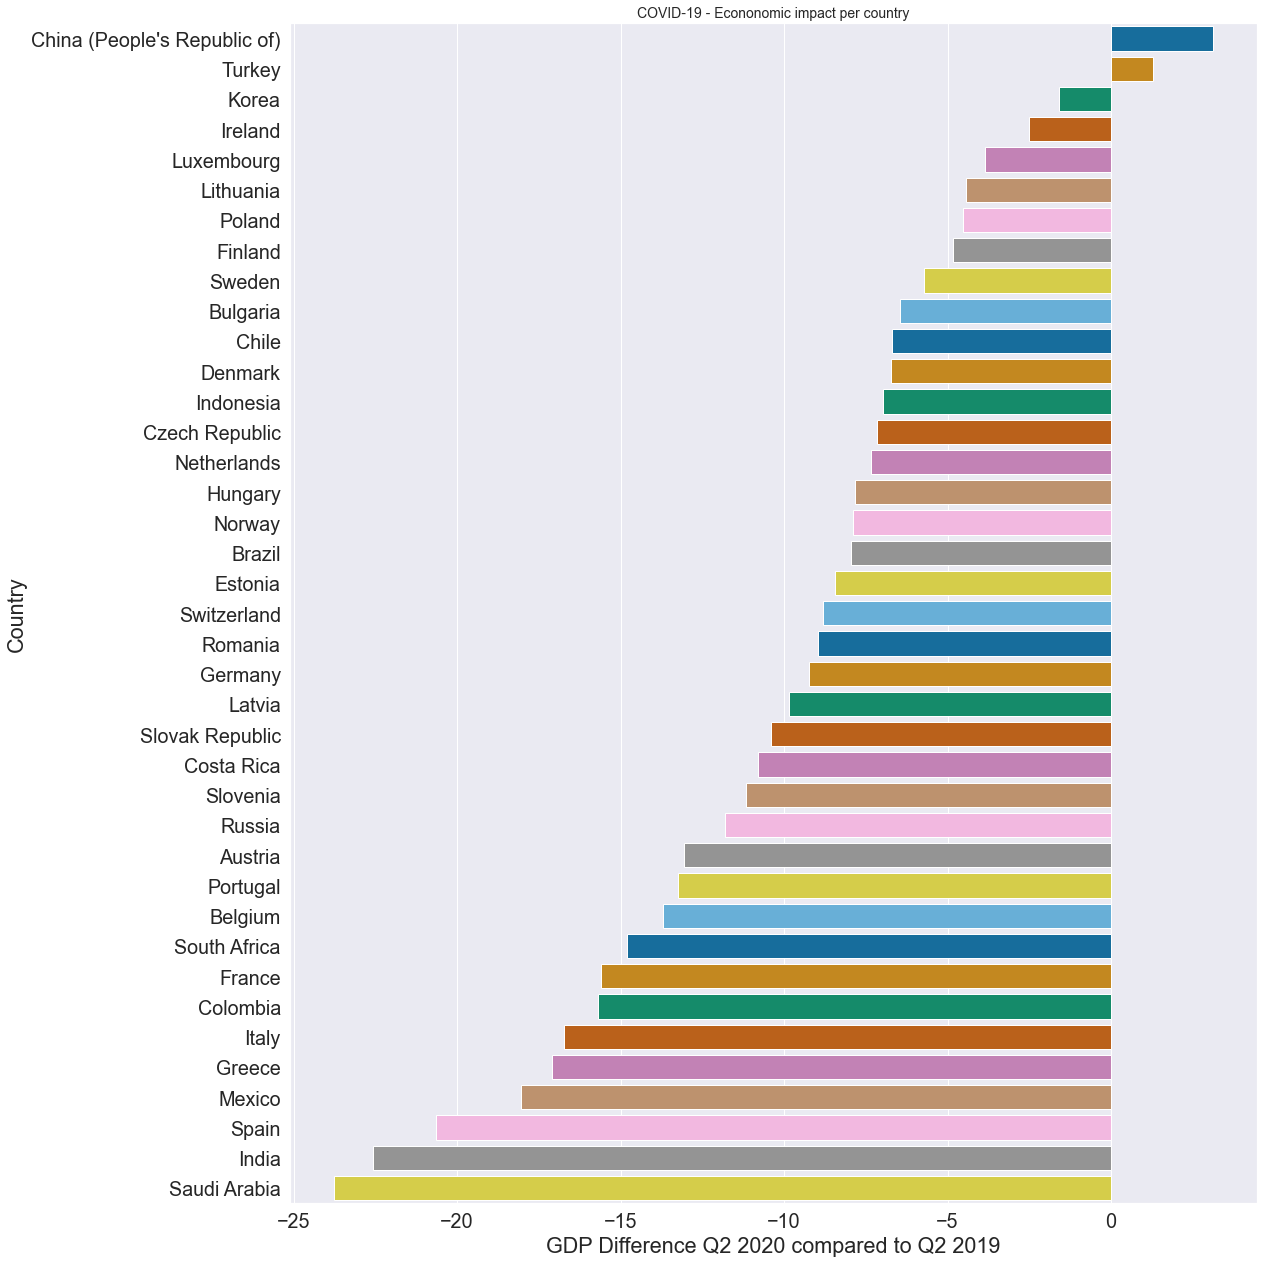

In [210]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 18))

# plot with seaborn
sns.set(font_scale = 1.8)

ax = sns.barplot(x='gdp_diff_q2', y='country', data=ec_df, 
                  palette='colorblind');
ax.set_title('COVID-19 - Econonomic impact per country', fontsize=14)
ax.set_xlabel('GDP Difference Q2 2020 compared to Q2 2019')
ax.set_ylabel('Country')
   
    
plt.tight_layout()
plt.savefig('graph_econ_impact.png')

# Scandinavia

In [221]:
scandi_names = ['Sweden', 'Denmark', 'Norway', 'Finland']

In [215]:
scandi_df = ec_df[ec_df['country'].isin(scandi_names)].sort_values(by='gdp_diff_q2', ascending=False)

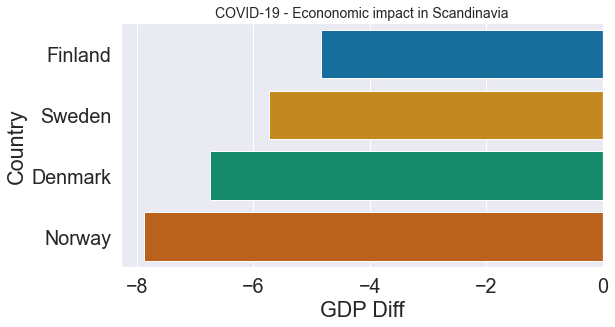

In [217]:
# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(9, 5))

ax = sns.barplot(x='gdp_diff_q2', y='country', data=scandi_df, 
                  palette='colorblind');
ax.set_title('COVID-19 - Econonomic impact in Scandinavia', fontsize=14)
ax.set_xlabel('GDP Diff')
ax.set_ylabel('Country')
   
    
plt.tight_layout()
plt.savefig('scandi_econ_impact.png')

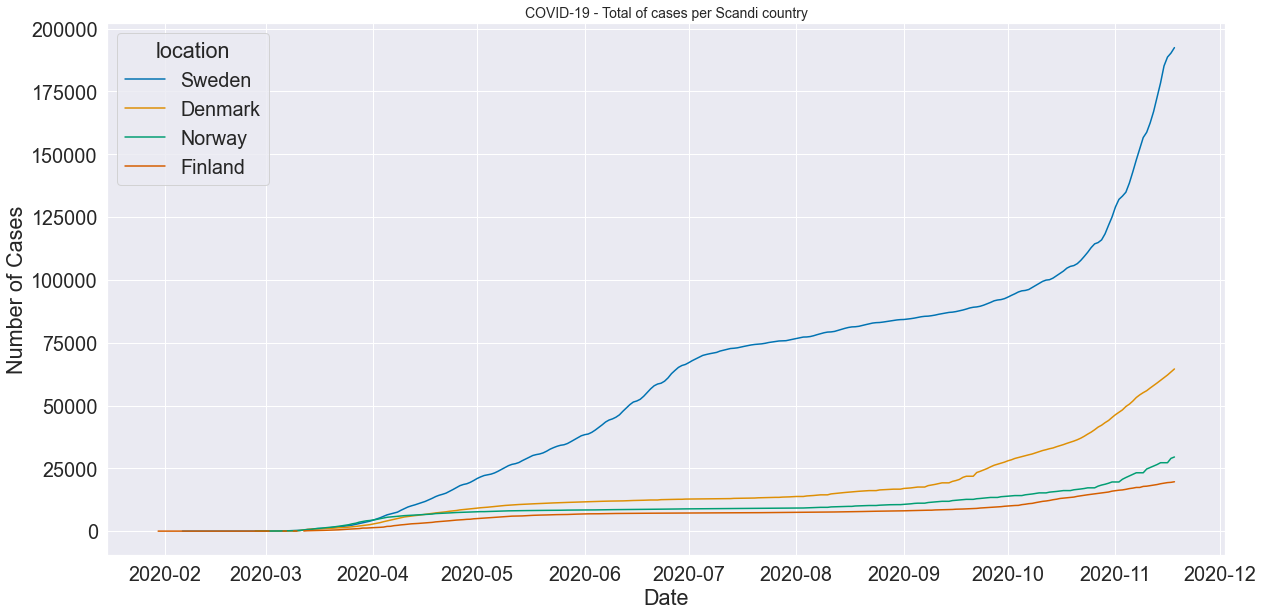

In [225]:
scandi_cases = df.copy()
scandi_cases.set_index('location', inplace = True)
scandi_cases = scandi_cases.loc[scandi_names]
scandi_cases = scandi_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')

plt.tight_layout()
#plt.savefig('graph6.png')

In [65]:
scandi_cases.columns

Index(['location', 'iso_code', 'continent', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

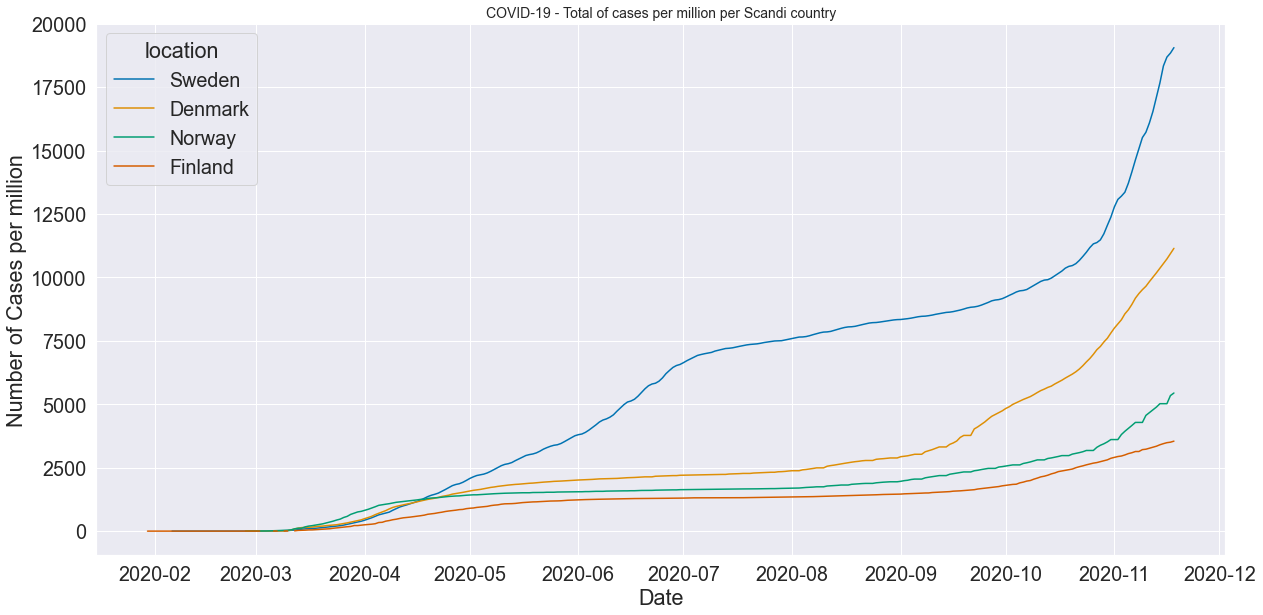

In [227]:
scandi_cases = df.copy()
scandi_cases.set_index('location', inplace = True)
scandi_cases = scandi_cases.loc[scandi_names]
scandi_cases = scandi_cases.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_cases_per_million', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of cases per million per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases per million')

plt.tight_layout()
plt.savefig('scandi_per_million.png')

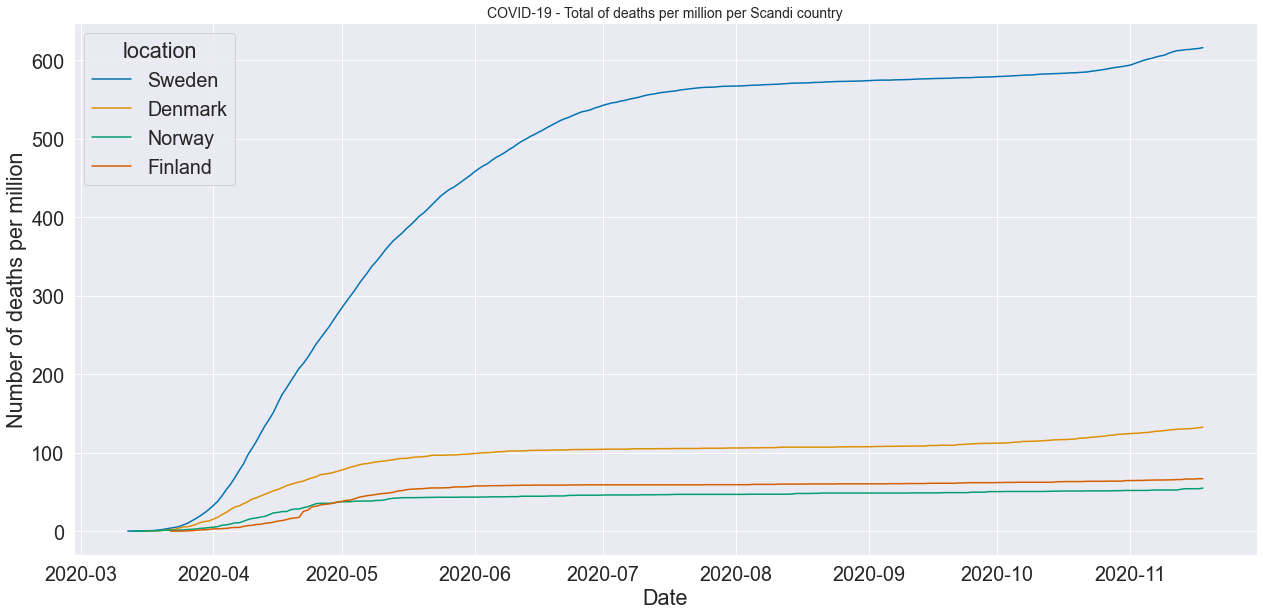

In [228]:
scandi_deaths = df.copy()
scandi_deaths.set_index('location', inplace = True)
scandi_deaths = scandi_deaths.loc[scandi_names]
scandi_deaths = scandi_deaths.reset_index()

# create the matplotlib figure instance
fig, ax = plt.subplots(figsize=(18, 9))

# plot with seaborn
ax = sns.lineplot(x='date', y='total_deaths_per_million', hue='location', data=scandi_cases, 
                  palette='colorblind');
ax.set_title('COVID-19 - Total of deaths per million per Scandi country', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of deaths per million')

plt.tight_layout()
plt.savefig('scandi_deaths.png')